In [1]:
!pip install keras

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# 딥러닝 frontend library로, 단독사용은 불가
import keras

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [5]:
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

Text(0.5, 1.0, '9')

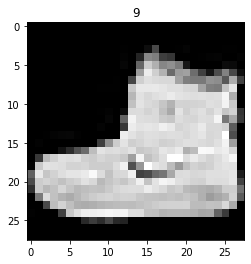

In [10]:
x0 = x_train[0]
plt.imshow(x0, cmap='gray')
plt.title(str(y_train[0]))

Text(0.5, 1.0, '0')

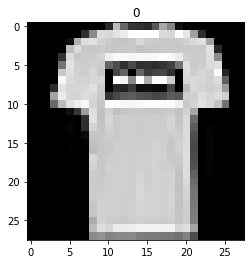

In [12]:
x0 = x_train[1]
plt.imshow(x0, cmap='gray')
plt.title(str(y_train[1]))

In [13]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
x_train.shape

(60000, 28, 28)

In [21]:
m = 10000
x = np.reshape(x_train, [60000, 28*28])[:m]
y = y_train[:m]
x.shape, y.shape


((10000, 784), (10000,))

# 사이키런으로 먼저 분류정확도를 측정해보세요

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression().fit(x, y)
model.score(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9552

In [28]:
K = 10 #클래스 종류
W1 = tf.Variable(tf.random_normal(shape=[784, 100])) ## x > hidden 784=28*28
b1 = tf.Variable(tf.random_normal(shape=[100]))
W2 = tf.Variable(tf.random_normal(shape=[100, K])) ## hidden > h 
b2 = tf.Variable(tf.random_normal(shape=[K])) # 이진분류라서 1이라 했지만, 다중분류이면 k개 설정
x = x.astype(np.float32)
xn = x / np.max(x, axis=-1, keepdims=True)
h1 = tf.sigmoid(tf.matmul(xn, W1)+b1)
out = tf.nn.softmax(tf.matmul(h1, W2)+b2)

gt = tf.one_hot(y, depth=10)
cost = -tf.reduce_mean(gt * tf.log(out) + (1-gt) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.cast(y, tf.int64), tf.arg_max(out, -1)), tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

W0909 15:51:01.716688  7264 deprecation.py:323] From <ipython-input-28-43fb226590aa>:14: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


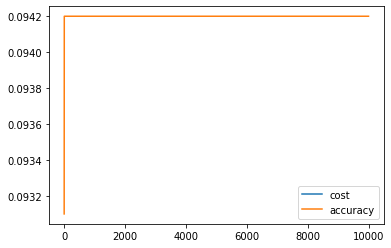

In [29]:
for i in range(10000):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()